In [322]:
#importing libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import pickle



**IMPORTING THE DATA**

In [323]:
path = Path('./breast-cancer.csv')
df = pd.read_csv(path)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [325]:
#checking for missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [326]:
#dropping the unnecessary column
df.drop('id', axis=1, inplace=True)

In [327]:
#checking for duplicates
df.duplicated().sum()

0

In [328]:
# checking for the unique values in the diagnosis column
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [219]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**COUNT PLOT ON THE TYPE OF CLASSES(TARGET)**

/tmp/ipykernel_19704/3366841893.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = [df.diagnosis.value_counts()[1], df.diagnosis.value_counts()[0]]
/tmp/ipykernel_19704/3366841893.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = [df.diagnosis.value_counts()[1], df.diagnosis.value_counts()[0]]


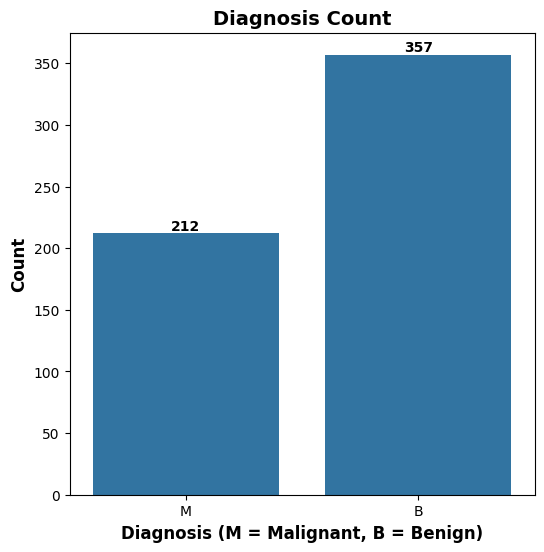

In [220]:
plt.figure(figsize=(6, 6))
sns.countplot(x =df.diagnosis)
plt.xlabel('Diagnosis (M = Malignant, B = Benign)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Diagnosis Count', fontsize=14, fontweight='bold')
count = [df.diagnosis.value_counts()[1], df.diagnosis.value_counts()[0]]
for i in range(2):
    plt.text(i, count[i], count[i], ha = 'center', va = 'bottom', fontweight='bold')
    
plt.show()


In [221]:
df.diagnosis = df.diagnosis.map({'M': 1, 'B': 0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [222]:
df.shape

(569, 31)

**DATA PREPARATION**

In [223]:

class Data(Dataset):
    def __init__(self, X, y):
        self.mode = None

        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.X = X
        self.y = y

    def get_splits(self, n_test=0.2):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=n_test, random_state=42)

    def __len__(self):
        if self.mode == 'train':
            return self.X_train.shape[0]
        elif self.mode == 'test':
            return self.X_test.shape[0]
        else:
            return self.X.shape[0]
    
    def __getitem__(self, idx):
        if self.mode == 'train':
            return {'Descriptor': self.X_train[idx], 'Label': self.y_train[idx]}
        elif self.mode == 'test':
            return {'Descriptor': self.X_test[idx], 'Label': self.y_test[idx]}
        else:
            return {'Descriptor': self.X[idx], 'Label': self.y[idx]}
        
    def normalize(self):
        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)
        with open('scaler.pkl', 'wb') as f:
            pickle.dump(scaler, f)
        print('Data Normalized')
        

    
    

In [224]:
X = df.drop('diagnosis', axis=1).values
y = df.diagnosis.values

In [225]:
df = Data(X, y)
df.normalize()


Data Normalized


In [226]:
df.get_splits()

In [227]:
df[568]

{'Descriptor': array([-1.80840125,  1.22179204, -1.81438851, -1.34778924, -3.11208479,
        -1.15075248, -1.11487284, -1.26181958, -0.8200699 , -0.56103238,
        -0.07027874,  0.3830925 , -0.15744905, -0.46615196,  0.04934236,
        -1.16351619, -1.05750068, -1.91344745,  0.75282996, -0.382754  ,
        -1.41089258,  0.76418957, -1.43273495, -1.07581292, -1.85901852,
        -1.2075525 , -1.30583065, -1.74506282, -0.04813821, -0.75120669]),
 'Label': 0}

**BUILDING OF MODEL**

In [228]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.fc(x)
        return x

In [229]:
X.shape

(569, 30)

In [230]:
Device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [231]:
model = Model(X.shape[1]).to(Device)

In [232]:
training_data = DataLoader(df, batch_size=10, shuffle=True)
testing_data = DataLoader(df, batch_size=10, shuffle=False)


In [233]:
criteria = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**FUNCTION FOR TRAINING AND TESTING THE ALGORITHM**

In [234]:
def train(model, training_data, criteria, optimizer, device):
    model.train()
    training_loss =[]
    accuracy_train = []
    model.mode = 'train'
    for i, data in enumerate(training_data):
        
        inputs = data['Descriptor'].float().to(device)
        labels = data['Label'].float().to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criteria(outputs.squeeze(), labels)
        accuracy = accuracy_score(labels.cpu().detach().numpy(), torch.round(outputs.squeeze()).cpu().detach().numpy())
        loss.backward()
        optimizer.step()
        
        training_loss.append(loss.item())
        accuracy_train.append(accuracy)

    return np.mean(training_loss), np.mean(accuracy_train)


def test(model, testing_data, criteria, device):
    model.eval()
    testing_loss = []
    accuracy_test = []
    model.mode = 'test'
    with torch.no_grad():
        for i, data in enumerate(testing_data):
            
            inputs = data['Descriptor'].float().to(device)
            labels = data['Label'].float().to(device)
            
            outputs = model(inputs)
            loss = criteria(outputs.squeeze(), labels)
            accuracy = accuracy_score(labels.cpu().detach().numpy(), torch.round(outputs.squeeze()).cpu().detach().numpy())
            
            testing_loss.append(loss.item())
            accuracy_test.append(accuracy)
            
    return np.mean(testing_loss), np.mean(accuracy_test)


def fit(model, training_data, testing_data, criteria, optimizer, device, epochs=1000):
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    patience = 5
    patience_counter = 0
    best_loss = np.inf
    for epoch in range(epochs):
        train_epoch_loss, train_epoch_accuracy = train(model, training_data, criteria, optimizer, device)
        test_epoch_loss, test_epoch_accuracy = test(model, testing_data, criteria, device)
        
        train_loss.append(train_epoch_loss)
        test_loss.append(test_epoch_loss)
        train_accuracy.append(train_epoch_accuracy)
        test_accuracy.append(test_epoch_accuracy)
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch: {epoch+1}/{epochs}, Train Loss: {train_epoch_loss}, Test Loss: {test_epoch_loss}, Train Accuracy: {train_epoch_accuracy}, Test Accuracy: {test_epoch_accuracy}')
        
        if test_epoch_loss < best_loss:
            best_loss = test_epoch_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter == patience:
                print('Early Stopping')
                break
    return train_loss, test_loss, train_accuracy, test_accuracy

In [235]:
train_loss, test_loss, train_accuracy, test_accuracy = fit(model, training_data, testing_data, criteria, optimizer, Device, epochs=1000)

Epoch: 10/1000, Train Loss: 0.04744084260483648, Test Loss: 0.04284684185608568, Train Accuracy: 0.987719298245614, Test Accuracy: 0.987719298245614
Epoch: 20/1000, Train Loss: 0.02483424233791435, Test Loss: 0.02110183330245363, Train Accuracy: 0.9927875243664718, Test Accuracy: 0.9929824561403509
Epoch: 30/1000, Train Loss: 0.011460974726919392, Test Loss: 0.009739389897288819, Train Accuracy: 0.9964912280701754, Test Accuracy: 0.9964912280701754
Epoch: 40/1000, Train Loss: 0.005679657275354737, Test Loss: 0.004472501076699537, Train Accuracy: 0.9982456140350877, Test Accuracy: 1.0
Epoch: 50/1000, Train Loss: 0.002572650779827375, Test Loss: 0.0024889559801363845, Train Accuracy: 1.0, Test Accuracy: 1.0
Epoch: 60/1000, Train Loss: 0.0013885429090382865, Test Loss: 0.0012233616545021715, Train Accuracy: 1.0, Test Accuracy: 1.0
Epoch: 70/1000, Train Loss: 0.000802187732533679, Test Loss: 0.0006930759352695052, Train Accuracy: 1.0, Test Accuracy: 1.0
Epoch: 80/1000, Train Loss: 0.000479

**PLOT ON THE COMPARISM OF THE TEST AND TRAIN LOSS**

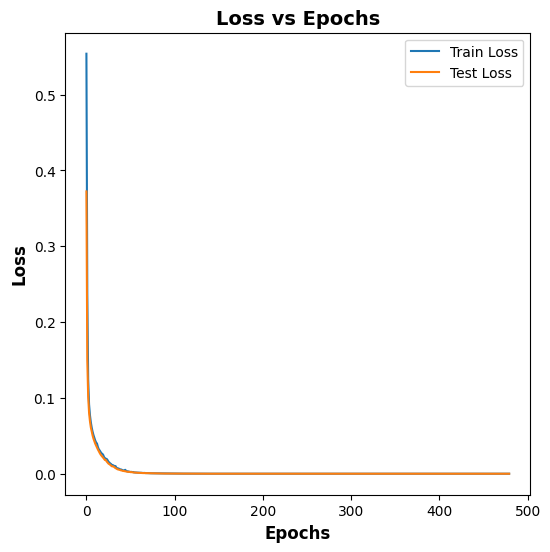

In [237]:
plt.figure(figsize=(6, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.title('Loss vs Epochs', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

**ALGORITHM EVALUATION**

In [236]:
acccuracy = accuracy_score(df.y_test, torch.round(model(torch.tensor(df.X_test).float().to(Device)).squeeze().cpu().detach()).numpy())
f1 = f1_score(df.y_test, torch.round(model(torch.tensor(df.X_test).float().to(Device)).squeeze().cpu().detach()).numpy())
precision = precision_score(df.y_test, torch.round(model(torch.tensor(df.X_test).float().to(Device)).squeeze().cpu().detach()).numpy())
recall = recall_score(df.y_test, torch.round(model(torch.tensor(df.X_test).float().to(Device)).squeeze().cpu().detach()).numpy())

print(f'Accuracy: {acccuracy}, F1 Score: {f1}, Precision: {precision}, Recall: {recall}')

Accuracy: 1.0, F1 Score: 1.0, Precision: 1.0, Recall: 1.0


**CONFUSION MATRIX**

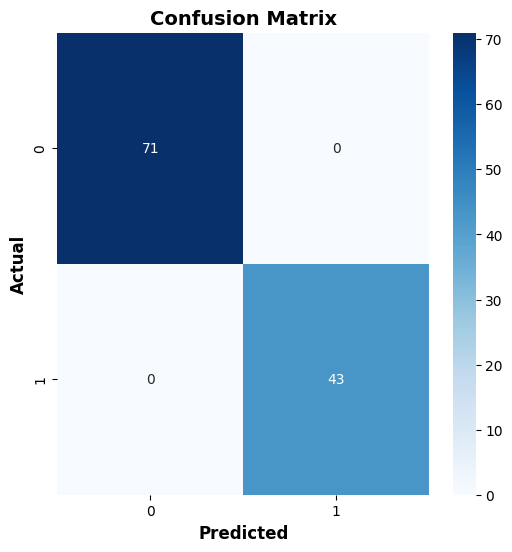

In [207]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(df.y_test, torch.round(model(torch.tensor(df.X_test).float().to(Device)).squeeze().cpu().detach()).numpy()), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.show()